Install tensorflow version 2

In [1]:
!pip install tensorflow==2

Import Necessary packages

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


## Data

- The data we will be using is the MNIST Dataset and it will be downloaded from the tensorflow dataset library. 

- The Fashion MNIST dataset contains 70,000 grayscale images group into 10 categories.

- Each image is a 28x28 pixel low resolution image. 

- We will divide the dataset into training and testing dataset.

- 60,000 will be used to train while 10,000 to test.

Each training and test example is assigned to one of the following labels:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot 


In [0]:
# Download the data from the keras dataset library
fashion_mnist = keras.datasets.fashion_mnist

# Split the data into train and test and load them into a numpy array
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

- The below code shows that we 60,000 images in the training set and 10,000 in the test set, and each image is represented as 28x28 pixels.

In [5]:
print('The total number of training images is {}'.format(train_images.shape))
print('The total number of test images is {}'.format(test_images.shape))

The total number of training images is (60000, 28, 28)
The total number of test images is (10000, 28, 28)


- Same 60,000 labels and our labels are integers from 0 to 9.

In [6]:
print('The total number of training labels is {}'.format(len(train_labels)))
print('The total number of test labels is {}'.format(len(test_labels)))

print(train_labels)

The total number of training labels is 60000
The total number of test labels is 10000
[9 0 0 ... 3 0 5]


## Preprocess the Data

- It is important to preprocess the data before training.

From the image plot below we can see that each image pixel values fall in the range of 0 to 255. We have to scale each image to a range of 0 to 1.

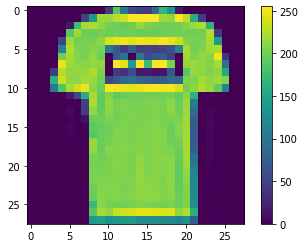

In [7]:
# SHow the plot of a single image and also show the scale
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
# Scale the images by dividing each images value by 255.0
train_images = train_images / 255.0

test_images = test_images / 255.0

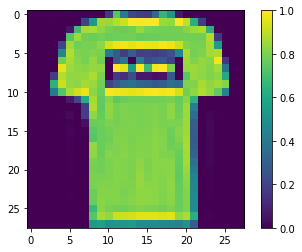

In [9]:
# Verify that the image has been scaled
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

##Building a simple Neural Network
 - The simple neural network contains the following properties.
  
  - Input layer
  - A single hidden layer
  - The output layer 

In [0]:
model = keras.Sequential([
    # input layer
    keras.layers.Flatten(input_shape=(28, 28)),
    # Single hidden layer
    keras.layers.Dense(128, activation='relu'),
    # Output layer with 10 nodes
    keras.layers.Dense(10)
])

- The first layer tf.keras.Flatten transforms the image format to a one-dimensional array of (28x28=784 pixels).

- The Dense layers are the fully connected layers.
- The first has 128 nodes and passes through a relu activation function.
- The output layer contains 10 nodes which represents the number of class in the MNIST fashion dataset.
- Although not shown in codes, the output layer passes through a softmax activation function.

### Compile the model.

- Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
- Optimizer —This is how the model is updated based on the data it sees and its loss function.
- Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the model

- The model.fit is used to train the model.
- Epochs is the number of iterations the model will be trained on the training data.

In [12]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.5019 - accuracy: 0.8233
Epoch 2/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3788 - accuracy: 0.8642
Epoch 3/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3387 - accuracy: 0.8764
Epoch 4/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3138 - accuracy: 0.8851
Epoch 5/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2980 - accuracy: 0.8906
Epoch 6/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2824 - accuracy: 0.8967
Epoch 7/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2695 - accuracy: 0.8986
Epoch 8/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2591 - accuracy: 0.9028
Epoch 9/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2500 - accuracy: 0.9071
Epoch 10/10
60

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.


### Evaluate accuracy

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.2888 - accuracy: 0.8805

Test accuracy: 0.8805


The accuracy on the test dataset is little less than the accuracy on the training dataset, this indicates overfitting.

Overfitting is when a machine learning model performs worse on new, previously unseen inputs than on the training data.

- We can imporve this by increasing the number of epochs to run the model on.
- Adding more training data.


## Deep Neural Network

Now lets dive into a deeper neural networks and see if the accuracy of the model will improve on both the training and test data.

- We can add more hidden layers to our neural networks.

In [0]:
deep_model = keras.Sequential([
    # input layer
    keras.layers.Flatten(input_shape=(28, 28)),

    # three hidden layers
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),

    # Output layer with 10 nodes
    keras.layers.Dense(10, activation='softmax')
])

In [0]:
deep_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

After comppiling the model, we fit the model on the training data and run on 10 epochs.

In [16]:
deep_model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 101us/sample - loss: 1.7080 - accuracy: 0.7554
Epoch 2/10
60000/60000 [==============================] - 6s 97us/sample - loss: 1.6396 - accuracy: 0.8208
Epoch 3/10
60000/60000 [==============================] - 6s 96us/sample - loss: 1.6294 - accuracy: 0.8309
Epoch 4/10
60000/60000 [==============================] - 6s 96us/sample - loss: 1.6258 - accuracy: 0.8347
Epoch 5/10
60000/60000 [==============================] - 6s 100us/sample - loss: 1.6210 - accuracy: 0.8396
Epoch 6/10
60000/60000 [==============================] - 6s 100us/sample - loss: 1.6203 - accuracy: 0.8403
Epoch 7/10
60000/60000 [==============================] - 6s 97us/sample - loss: 1.6208 - accuracy: 0.8400
Epoch 8/10
60000/60000 [==============================] - 6s 95us/sample - loss: 1.6207 - accuracy: 0.8400
Epoch 9/10
60000/60000 [==============================] - 6s 94us/sample - loss: 1.6276 - accuracy: 0.8331
Epoch 10/10

In [17]:
test_loss, test_acc = deep_model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 1.6053 - accuracy: 0.8366

Test accuracy: 0.8366


- The deep neural network doesn't perform better on the training dataset. But we see the test set with a better accuracy than the train set.


#Convolution Neural Network

A neural network in which at least one layer is a convolutional layer. A typical convolutional neural network consists of some combination of the following layers:

- convolutional layers
- pooling layers
- dense layers

We train the dataset on the convolution neural network. This is another form of deep neural network.

### Convolution Model

The convolution base contains a convolution layer and a MaxPooling layer.

The MaxPooling2D is a filter/kernel used to downsize the image and also retains most of the fetaures of the images. We use a 2x2 kernel here.

Notice the input_shape(28,28,1), this means that we have a grayscale image with 28x28 pixels.

Reshape the train and test images to be on the same dimension.



In [0]:
train_images_reshaped = train_images.reshape(-1, 28, 28,1)
test_images_reshaped = test_images.reshape(-1,28,28,1)

In [19]:
conv_model = models.Sequential()
# first convolution layer
conv_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
conv_model.add(layers.MaxPooling2D((2, 2)))

# second convolution layer
conv_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
conv_model.add(layers.MaxPooling2D((2, 2)))

# third layer without a maxpool
conv_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# flatten the model and add a single dense layer
conv_model.add(layers.Flatten())
conv_model.add(layers.Dense(64, activation='relu'))

# output layer
conv_model.add(layers.Dense(10))

conv_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

Compile and train the model.

- The parameters and values are still same from previous examples.

In [20]:
conv_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = conv_model.fit(train_images_reshaped, train_labels, epochs=10,
                    validation_data=(test_images_reshaped, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 49s 818us/sample - loss: 0.5010 - accuracy: 0.8188 - val_loss: 0.3907 - val_accuracy: 0.8589
Epoch 2/10
60000/60000 [==============================] - 48s 803us/sample - loss: 0.3253 - accuracy: 0.8813 - val_loss: 0.3094 - val_accuracy: 0.8875
Epoch 3/10
60000/60000 [==============================] - 48s 794us/sample - loss: 0.2794 - accuracy: 0.8973 - val_loss: 0.2918 - val_accuracy: 0.8924
Epoch 4/10
60000/60000 [==============================] - 47s 787us/sample - loss: 0.2508 - accuracy: 0.9079 - val_loss: 0.2925 - val_accuracy: 0.8929
Epoch 5/10
60000/60000 [==============================] - 48s 798us/sample - loss: 0.2282 - accuracy: 0.9161 - val_loss: 0.2767 - val_accuracy: 0.8986
Epoch 6/10
60000/60000 [==============================] - 49s 816us/sample - loss: 0.2071 - accuracy: 0.9241 - val_loss: 0.3039 - val_accuracy: 0.8930
Epoch 7/10
60000/60000 [====================

- There is an improvement in both training accuracy and validation accuracy.


### Evalute the model

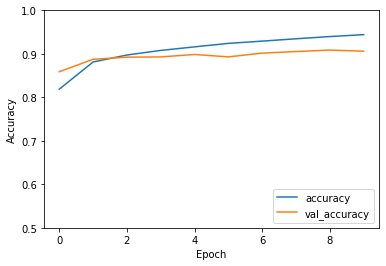

In [21]:
# Plot the model training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

- Plot shows the accuracy of both the train and validation data after each epoch.

# Predictions

In [0]:
probability_model = tf.keras.Sequential([conv_model, 
                                         tf.keras.layers.Softmax()])

- Convert the model outputs to probability

In [0]:
predictions = probability_model.predict(test_images_reshaped)

In [25]:
predictions[0]

array([1.9363503e-08, 4.2351079e-05, 1.1647673e-08, 1.6357351e-08,
       1.1256308e-08, 1.9276835e-04, 5.4557505e-09, 2.6176148e-04,
       2.3155872e-07, 9.9950278e-01], dtype=float32)

- Produce predictions as an array of 10 numbers.

They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value

In [26]:
np.argmax(predictions[0])

9

In [27]:
test_labels[0]

9

A graph to plot the predictions of all the 10 class

In [0]:
def plot_image(i, predictions_array, true_label, img):
  """
  A function to plot the image and its labels
  """
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

# Blue of the prediction is coreect and red for wrong predictions
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  """
  A function to plot the value array of the predictions along side it probability score
  """
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

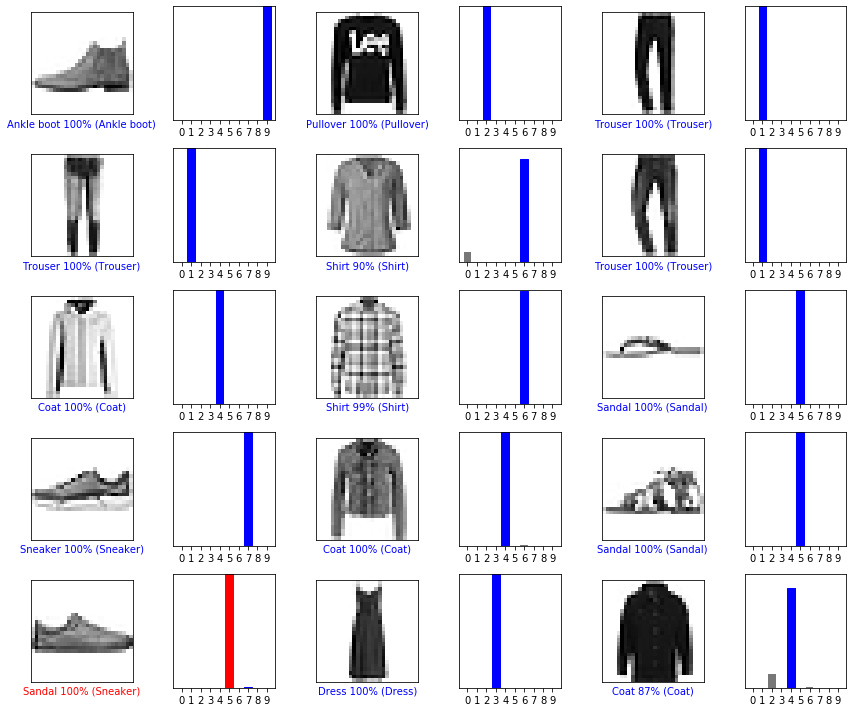

In [30]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

From all the plots above, we see that there was only one misclassified image which is the sneaker misclassified as a sandals.